In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Part 1: Datos

In [3]:
# Load data
iris = load_iris()
X = iris.data
Y = iris.target

print("Data shape:", X.shape)
print("Examples:\n", X[:10])
print("\nLabels shape", Y.shape)
print("Examples:\n", Y)
print("Class names:", iris.target_names)

Data shape: (150, 4)
Examples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Labels shape (150,)
Examples:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [4]:
# Print more info
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

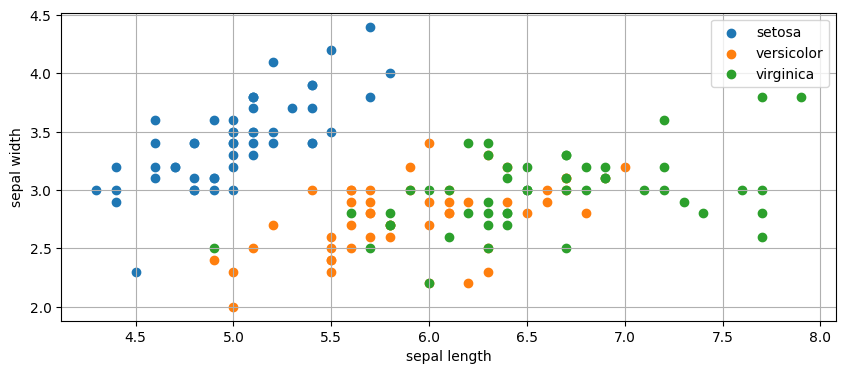

In [5]:
# Plot two features: petal length and petal width
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

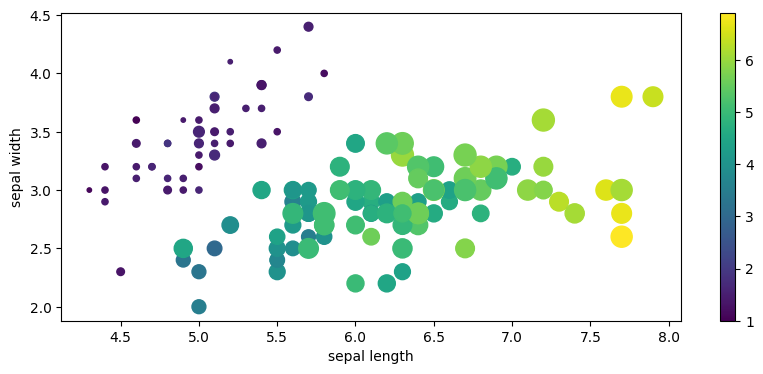

In [6]:
# == Q1: ==
# Idea alguna manera de visualizar y diferenciar las 4 variables al mismo tiempo,
# usando una sola gráfica 2D. Muestra tu solución:
plt.figure(figsize=(10, 4))
# Completa aquí
#make de color of the point be X[:, 2] and the size of the point be X[:, 3]
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2], s=X[:, 3]*100)
#add legend and labels
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#color bar with petal length legend
plt.colorbar()

plt.show()

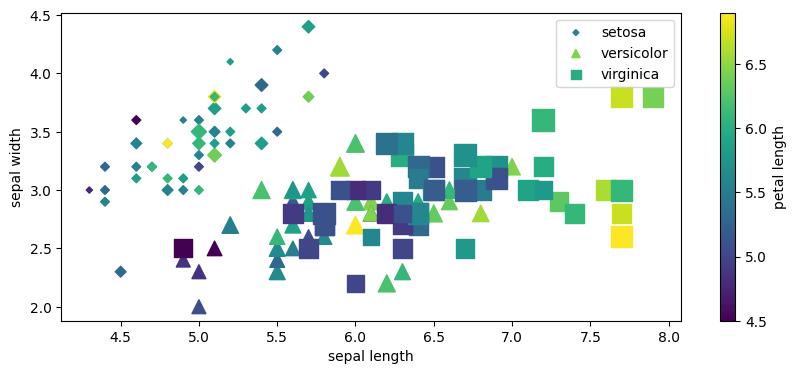

In [7]:
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0], c=X[Y==0, 2], s=X[Y==0, 3]*100, marker='D')
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1], c=X[Y==1, 2], s=X[Y==1, 3]*100, marker='^')
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2], c=X[Y==2, 2], s=X[Y==2, 3]*100, marker='s')
#axis labels
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#color bar label
plt.colorbar(label='petal length')
#shape legend
plt.legend(markerscale=0.5)
#size is proportional to petal width


plt.show()

In [8]:
# Let's keep two classes only, and two variables
X = iris.data[:100, :2]
Y = iris.target[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
# Split data into training + test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

print(x_train.shape) # 90 data points de dos variables cada uno
print(x_test.shape) # 10 data points de dos variables cada uno
print(y_train.shape) # 90 labels
print(y_test.shape) # 10 labels  

(90, 2)
(10, 2)
(90,)
(10,)


# Part 2: Perceptron

In [14]:
# Define class linear (step) perceptron
class LPerceptron:
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
  
  #activation function  
  def activation(self, x):
    #regresa 1 si el producto punto de w y x es mayor o igual a b, 0 en otro caso
    return 1 if (np.dot(self.w, x) >= self.b) else 0 
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      result = self.activation(x)
      Y.append(result)
    return np.array(Y)

  #train

  def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1, verbose=False):
    '''
    X: data
    Y: labels
    n_epochs: number of epochs
    lr: learning rate, tamaño del paso
    val_split: validation split
    verbose: print accuracy
    '''
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
    
    #initialize weights and bias
    #weight es un vector de elementos aleatorios de tamaño igual a X.shape[1]
    self.w = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train))
    accuracy[1] = accuracy_score(y_val, self.predict(x_val))
    if verbose:
      #accuracy[0]:6.4f es para que solo muestre 6 decimales y 4 espacios
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        y_hat = self.activation(x)
        d_err = y - y_hat
        #ajusta el peso, si se pasa de la predicción, será negativo y se restará
        #el tamaño del ajuste depende de la tasa de aprendizaje (lr)
        self.w = self.w + lr * d_err * x  #LA
        self.b = self.b + lr * d_err      #LB
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [15]:
# == Q2: ==
# Explica qué sucede en las líneas comentadas como #LA y #LB.
# ¿Qué significa cada térmido de las ecuaciones?
# sel.w es el vector de pesos
# lr es el learning rate
# d_err es el error (y - y_hat)
# x es el vector de entrada
# ¿Por qué las expresiones contienen el término "err"?
# porque es el error, diferencia entre el valor real y el valor predicho
# ¿Por qué la expresión en #LA contiene la variable de entrada "x"?
# 
# ¿Cuántas iteraciones suceden en el loop interno del método fit?
# n_epochs * x_train.shape[0], epocas * muestras

In [80]:
# Create a model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.0009, val_split=0.1, verbose=True)
# Encuentra el mejor learning rate lr

Epoch:   0 -- acc: 0.5432, acc_val: 0.2222
Epoch:   1 -- acc: 0.5432, acc_val: 0.2222
Epoch:   2 -- acc: 0.5432, acc_val: 0.2222
Epoch:   3 -- acc: 0.5432, acc_val: 0.2222
Epoch:   4 -- acc: 0.0370, acc_val: 0.0000
Epoch:   5 -- acc: 0.0123, acc_val: 0.0000
Epoch:   6 -- acc: 0.0123, acc_val: 0.0000
Epoch:   7 -- acc: 0.0123, acc_val: 0.0000
Epoch:   8 -- acc: 0.0123, acc_val: 0.0000
Epoch:   9 -- acc: 0.1235, acc_val: 0.4444
Epoch:  10 -- acc: 0.2840, acc_val: 0.5556
Epoch:  11 -- acc: 0.2593, acc_val: 0.4444
Epoch:  12 -- acc: 0.1358, acc_val: 0.2222
Epoch:  13 -- acc: 0.2840, acc_val: 0.1111
Epoch:  14 -- acc: 0.5185, acc_val: 0.4444
Epoch:  15 -- acc: 0.6543, acc_val: 0.4444
Epoch:  16 -- acc: 0.7778, acc_val: 0.5556
Epoch:  17 -- acc: 0.8395, acc_val: 0.5556
Epoch:  18 -- acc: 0.8765, acc_val: 0.6667
Epoch:  19 -- acc: 0.7284, acc_val: 0.4444
Epoch:  20 -- acc: 0.8395, acc_val: 0.5556
Epoch:  21 -- acc: 0.8765, acc_val: 0.5556
Epoch:  22 -- acc: 0.8889, acc_val: 0.5556
Epoch:  23 

In [81]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 1.0


In [82]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [ 0.0287885  -0.10943308]
bias: -0.1836000000000006


In [83]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras establecer verbose=False),
# y reporta el promedio +- desviación estándar obtenidos al final de la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?
ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.0009, val_split=0.1, verbose=False) # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9430 +- 0.0475
Validation:	 0.9333 +- 0.0903
Test:		 0.9980 +- 0.0140


In [ ]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X =    # Completar aquí
Y =    # Completar aquí

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit() # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.9995 +- 0.0030
Validation:	 0.9822 +- 0.0437
Test:		 0.9990 +- 0.0099


In [ ]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases
# versicolor (1) y virginica (2).
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?

X = iris.data[50:]
Y = iris.target[:100]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit() # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.8606 +- 0.0663
Validation:	 0.8489 +- 0.1470
Test:		 0.9480 +- 0.0922


# Part 3: Non-linear (sigmoid) Perceptron

In [ ]:
# Completa el siguiente código del perceptron no lineal (sigmoide)

In [ ]:
# Define class perceptron
class Perceptron:
  #constructor
  def __init__ (self):
    self.W = None
    self.b = None
  
  #total neuron input
  def lin_sum(self, X):
    return np.dot(self.W, X) + self.b
  
  #activation (sigmoid)
  def sigmoid(self, s):
    return 1.0 / (1.0 + np.exp(-s))
  
  #derivative of activation (sigmoid)
  def d_sigmoid(self, s):
    return self.sigmoid(s) * (1.0 - self.sigmoid(s))
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      s = self.lin_sum(x)
      y = self.sigmoid(s)
      Y.append(y)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1, verbose=False):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    self.W = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
    accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
    if verbose:
      print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        # Forward pass
        s = self.lin_sum(x)
        y_hat = self.sigmoid(s)
        # Backward pass
        d_err = y - y_hat
        self.W =  # Completar aquí
        self.b =  # Completar aquí
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
      if verbose:
        print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [ ]:
# == Q6: ==
# Repite el experimento anterior usando las 4 variables de las clases 
# versicolor (1) y virginica (2), pero ahora usando el Perceptron logístico.
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?

X = iris.data[50:]
Y = iris.target[:100]

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = Perceptron()
  acc_history = perceptron.fit() # Completar aquí
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

(100, 4)
(100,)
Training:	 0.9169 +- 0.0881
Validation:	 0.9222 +- 0.0988
Test:		 0.8930 +- 0.1451


# Part 4: Sklearn Perceptron

In [ ]:
# Manually divide train, val, y test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
# Use perceptron from scikit-learn
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(max_iter=50, eta0=0.003)
sk_perceptron.fit(x_train, y_train)

Perceptron(eta0=0.003, max_iter=50)

In [ ]:
# Print performance
print(f"Training:\t {sk_perceptron.score(x_train, y_train):.4f}")
print(f"Validation:\t {sk_perceptron.score(x_val, y_val):.4f}")
print(f"Test:\t\t {sk_perceptron.score(x_test, y_test):.4f}")

Training:	 1.0000
Validation:	 1.0000
Test:		 0.7000
